In [1]:
#!pip install missingno

In [1]:
import pandas as pd
import pandas as pd
import missingno as msno
from numpy.core.multiarray import result_type
import numpy as np


In [2]:
keep = ['NU_ANO_CENSO','SG_UF','CO_ENTIDADE','CO_MUNICIPIO',
        'TP_SITUACAO_FUNCIONAMENTO','TP_DEPENDENCIA','TP_LOCALIZACAO',
        'IN_LOCAL_FUNC_GALPAO','IN_PREDIO_COMPARTILHADO',
        'IN_AGUA_REDE_PUBLICA','IN_ENERGIA_REDE_PUBLICA',
        'IN_LIXO_SERVICO_COLETA','IN_ALMOXARIFADO', 'IN_AUDITORIO',
        'IN_BIBLIOTECA','IN_BIBLIOTECA_SALA_LEITURA','IN_LABORATORIO_CIENCIAS',
        'IN_LABORATORIO_INFORMATICA','IN_QUADRA_ESPORTES',
        'IN_SALA_DIRETORIA','IN_SECRETARIA','QT_SALAS_UTILIZADAS_DENTRO',
        'QT_SALAS_UTILIZA_CLIMATIZADAS','IN_COMPUTADOR','IN_EQUIP_COPIADORA',
        'IN_EQUIP_IMPRESSORA','IN_EQUIP_IMPRESSORA_MULT','IN_INTERNET',
        'IN_BANDA_LARGA','QT_PROF_ADMINISTRATIVOS','QT_PROF_GESTAO',
        'IN_ORGAO_ASS_PAIS','IN_ORGAO_ASS_PAIS_MESTRES',
        'IN_ORGAO_CONSELHO_ESCOLAR','IN_ORGAO_GREMIO_ESTUDANTIL',
        'TP_PROPOSTA_PEDAGOGICA','IN_REGULAR','IN_EJA']

In [3]:
# read data
filemainpath = "/home/freitas/Downloads/internet2/"
censo = {}
for year in range(2014, 2020):
    filepath = f'microdados_censo_escolar_{year}/{year}/dados/'
    filename = f'microdados_ed_basica_{year}.csv'
    censo['censo_'+str(year)] = pd.read_csv(filemainpath + filepath + filename, sep=';', encoding='latin1')
    censo['censo_'+str(year)] = censo['censo_'+str(year)][keep]
    censo['censo_'+str(year)] = censo['censo_'+str(year)][(censo['censo_'+str(year)].TP_SITUACAO_FUNCIONAMENTO == 1)]
    censo['censo_'+str(year)] = censo['censo_'+str(year)][(censo['censo_'+str(year)].TP_DEPENDENCIA == 2) | (censo['censo_'+str(year)].TP_DEPENDENCIA == 3)]
    # censo['censo_'+str(year)]['IN_BANDA_LARGA'] = censo['censo_'+str(year)]['IN_BANDA_LARGA'].replace(np.nan,pd.NA)
    # censo['censo_'+str(year)]['IN_PREDIO_COMPARTILHADO'] = censo['censo_'+str(year)]['IN_PREDIO_COMPARTILHADO'].replace(np.nan,pd.NA)
    # censo['censo_'+str(year)]['IN_EJA'] = censo['censo_'+str(year)]['IN_EJA'].replace(np.nan,pd.NA)
    # for var in censo['censo_'+str(year)].columns[8:]:
    #     censo['censo_'+str(year)][var] = censo['censo_'+str(year)][var].astype(int)
    

/tmp/ipykernel_5838/2568017010.py:7: DtypeWarning: Columns (27) have mixed types. Specify dtype option on import or set low_memory=False.
  censo['censo_'+str(year)] = pd.read_csv(filemainpath + filepath + filename, sep=';', encoding='latin1')


RecursionError: maximum recursion depth exceeded while calling a Python object

In [8]:
path_censo_2020 = "/home/freitas/Downloads/internet2/microdados_censo_escolar_2020/2020/dados/"+"microdados_ed_basica_2020.CSV"
for year in range(2020,2022):
    censo['censo_'+str(year)] = pd.read_csv(path_censo_2020, sep=';', encoding='latin1')
    censo['censo_'+str(year)] = censo['censo_'+str(year)][keep]
    censo['censo_'+str(year)] = censo['censo_'+str(year)][(censo['censo_'+str(year)].TP_SITUACAO_FUNCIONAMENTO == 1)]
    censo['censo_'+str(year)] = censo['censo_'+str(year)][(censo['censo_'+str(year)].TP_DEPENDENCIA == 2) | (censo['censo_'+str(year)].TP_DEPENDENCIA == 3)]
    # censo['censo_'+str(year)]['IN_BANDA_LARGA'] = censo['censo_'+str(year)]['IN_BANDA_LARGA'].fillna(pd.NA)
    # censo['censo_'+str(year)]['IN_PREDIO_COMPARTILHADO'] = censo['censo_'+str(year)]['IN_PREDIO_COMPARTILHADO'].fillna(pd.NA)
    # censo['censo_'+str(year)]['IN_EJA'] = censo['censo_'+str(year)]['IN_EJA'].fillna(pd.NA)
 

/tmp/ipykernel_34472/737679617.py:3: DtypeWarning: Columns (27) have mixed types. Specify dtype option on import or set low_memory=False.
  censo['censo_'+str(year)] = pd.read_csv(path_censo_2020, sep=';', encoding='latin1')
/tmp/ipykernel_34472/737679617.py:3: DtypeWarning: Columns (27) have mixed types. Specify dtype option on import or set low_memory=False.
  censo['censo_'+str(year)] = pd.read_csv(path_censo_2020, sep=';', encoding='latin1')


In [13]:
print(censo.keys())
# merge all dataframes
censo = pd.concat(censo.values(), ignore_index=True)

Index(['NU_ANO_CENSO', 'SG_UF', 'CO_ENTIDADE', 'CO_MUNICIPIO',
       'TP_SITUACAO_FUNCIONAMENTO', 'TP_DEPENDENCIA', 'TP_LOCALIZACAO',
       'IN_LOCAL_FUNC_GALPAO', 'IN_PREDIO_COMPARTILHADO',
       'IN_AGUA_REDE_PUBLICA', 'IN_ENERGIA_REDE_PUBLICA',
       'IN_LIXO_SERVICO_COLETA', 'IN_ALMOXARIFADO', 'IN_AUDITORIO',
       'IN_BIBLIOTECA', 'IN_BIBLIOTECA_SALA_LEITURA',
       'IN_LABORATORIO_CIENCIAS', 'IN_LABORATORIO_INFORMATICA',
       'IN_QUADRA_ESPORTES', 'IN_SALA_DIRETORIA', 'IN_SECRETARIA',
       'QT_SALAS_UTILIZADAS_DENTRO', 'QT_SALAS_UTILIZA_CLIMATIZADAS',
       'IN_COMPUTADOR', 'IN_EQUIP_COPIADORA', 'IN_EQUIP_IMPRESSORA',
       'IN_EQUIP_IMPRESSORA_MULT', 'IN_INTERNET', 'IN_BANDA_LARGA',
       'QT_PROF_ADMINISTRATIVOS', 'QT_PROF_GESTAO', 'IN_ORGAO_ASS_PAIS',
       'IN_ORGAO_ASS_PAIS_MESTRES', 'IN_ORGAO_CONSELHO_ESCOLAR',
       'IN_ORGAO_GREMIO_ESTUDANTIL', 'TP_PROPOSTA_PEDAGOGICA', 'IN_REGULAR',
       'IN_EJA'],
      dtype='object')


TypeError: 'numpy.ndarray' object is not callable

In [14]:
censo.head()
print(censo.shape)


(1147135, 38)


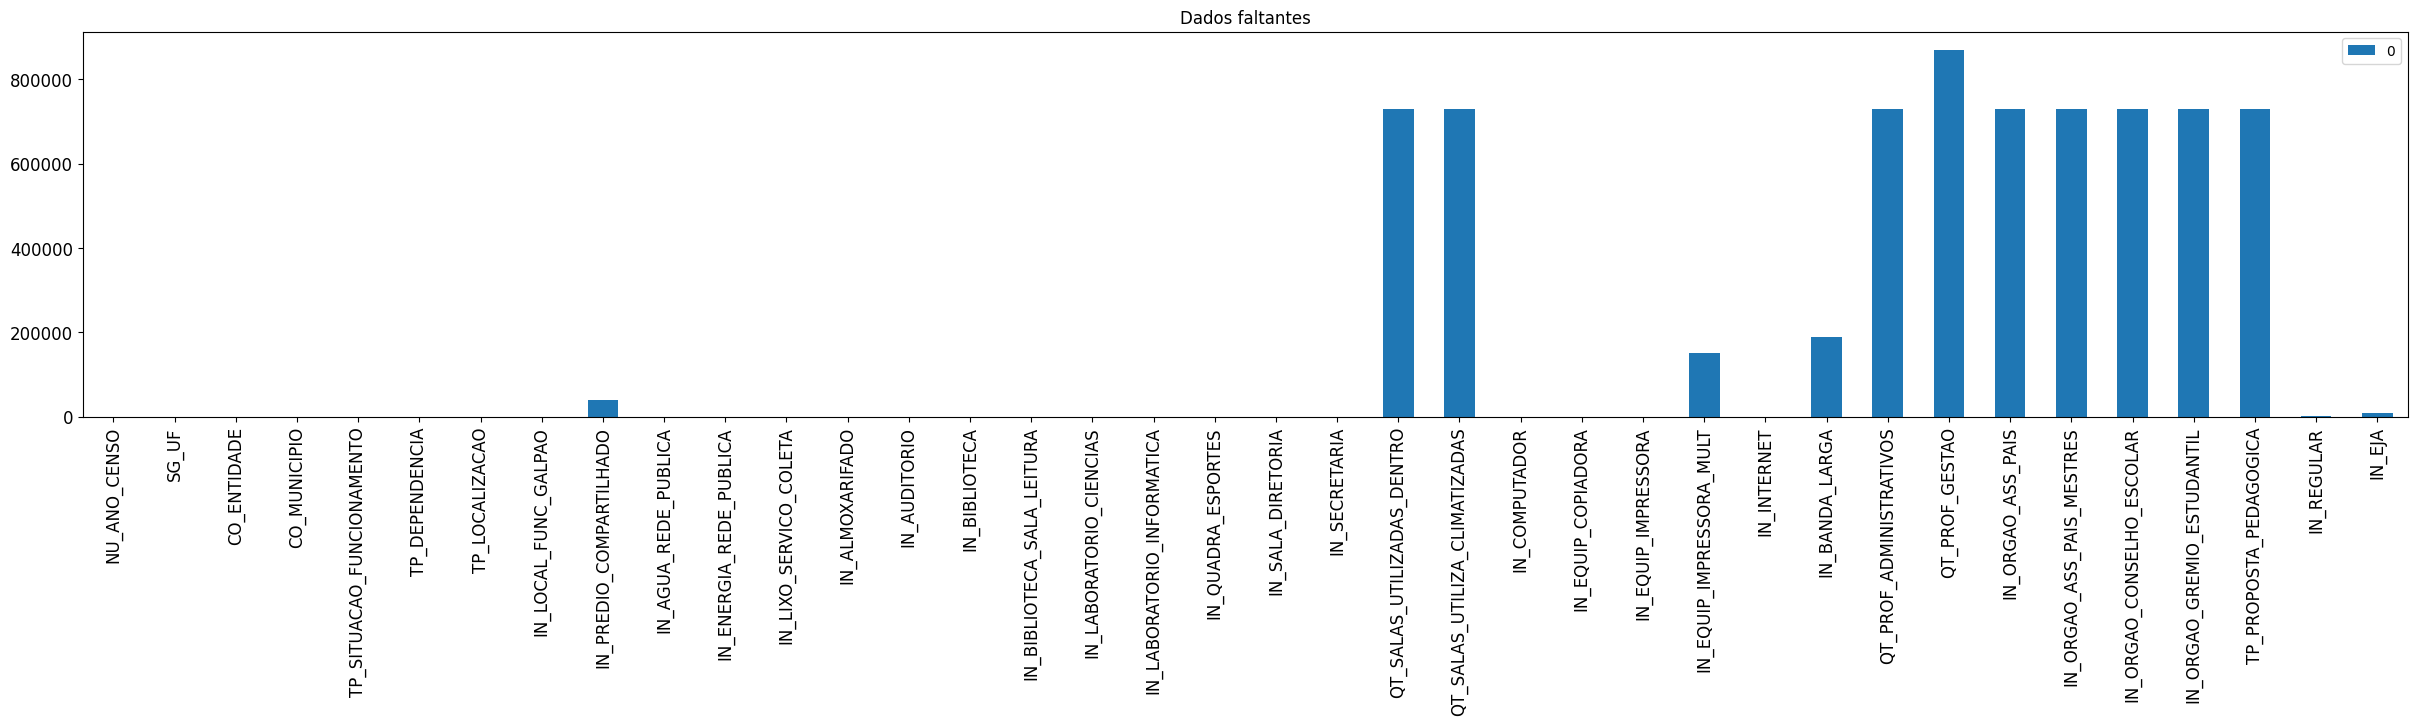

In [15]:
pd.DataFrame(censo.isnull().sum()).plot(kind='bar',title='Dados faltantes',fontsize=12,figsize=(30,5));

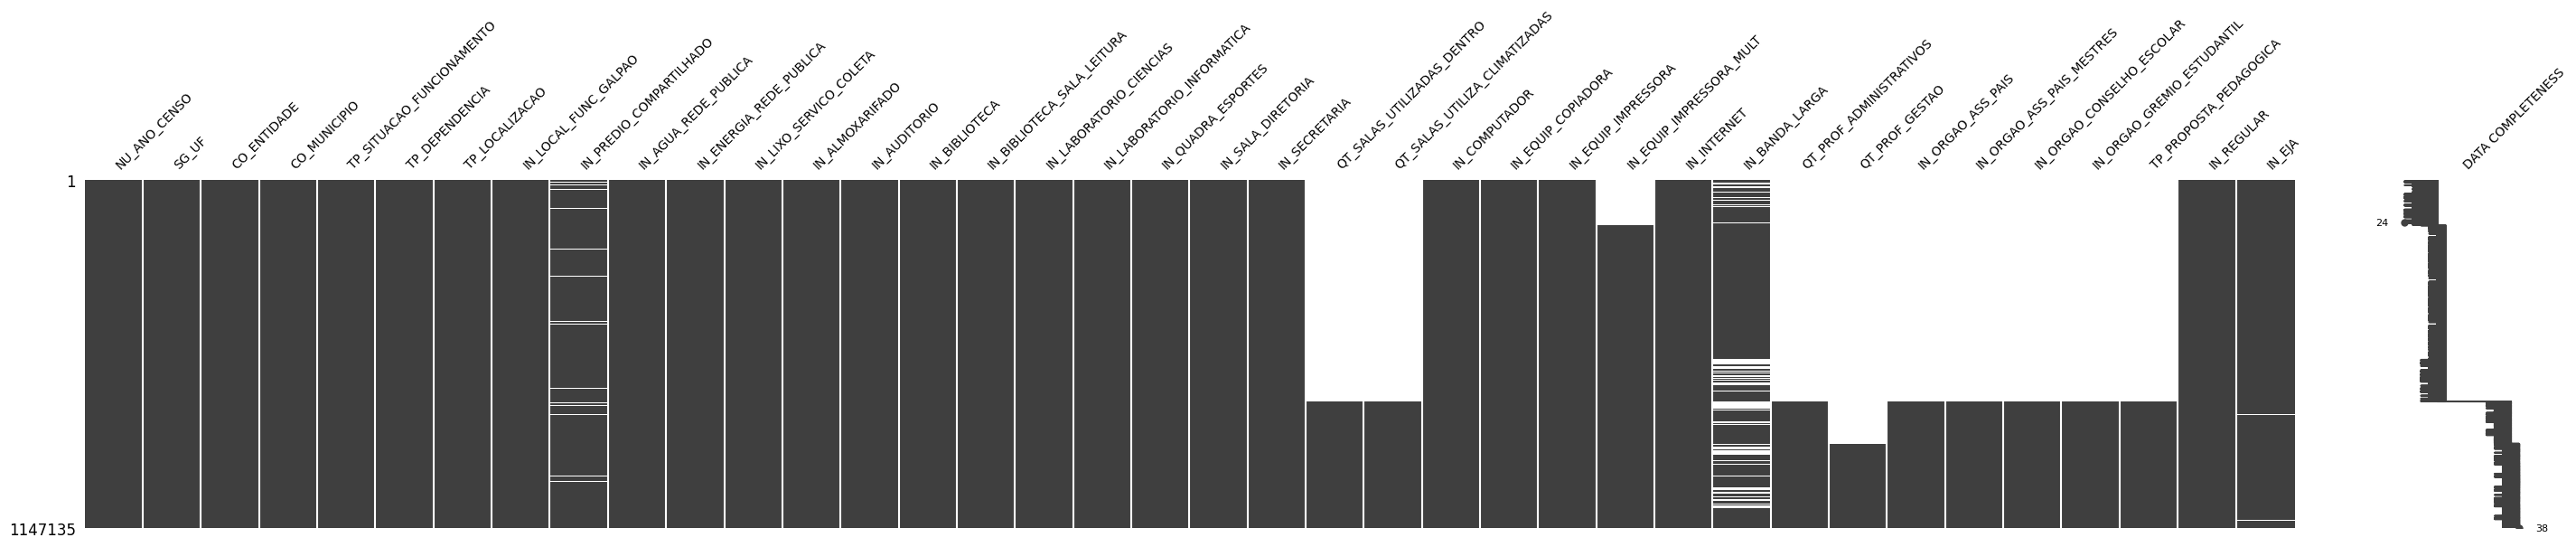

In [16]:
msno.matrix(censo,labels=True,fontsize=10,figsize=(35,5));

In [17]:
drop = ['QT_SALAS_UTILIZADAS_DENTRO', 'QT_SALAS_UTILIZA_CLIMATIZADAS',
        'QT_PROF_ADMINISTRATIVOS', 'QT_PROF_GESTAO','IN_ORGAO_ASS_PAIS', 
        'IN_ORGAO_CONSELHO_ESCOLAR', 'IN_ORGAO_GREMIO_ESTUDANTIL', 
        'TP_PROPOSTA_PEDAGOGICA','IN_ORGAO_ASS_PAIS_MESTRES','IN_EQUIP_IMPRESSORA_MULT']
censo.drop(columns=drop, inplace=True)

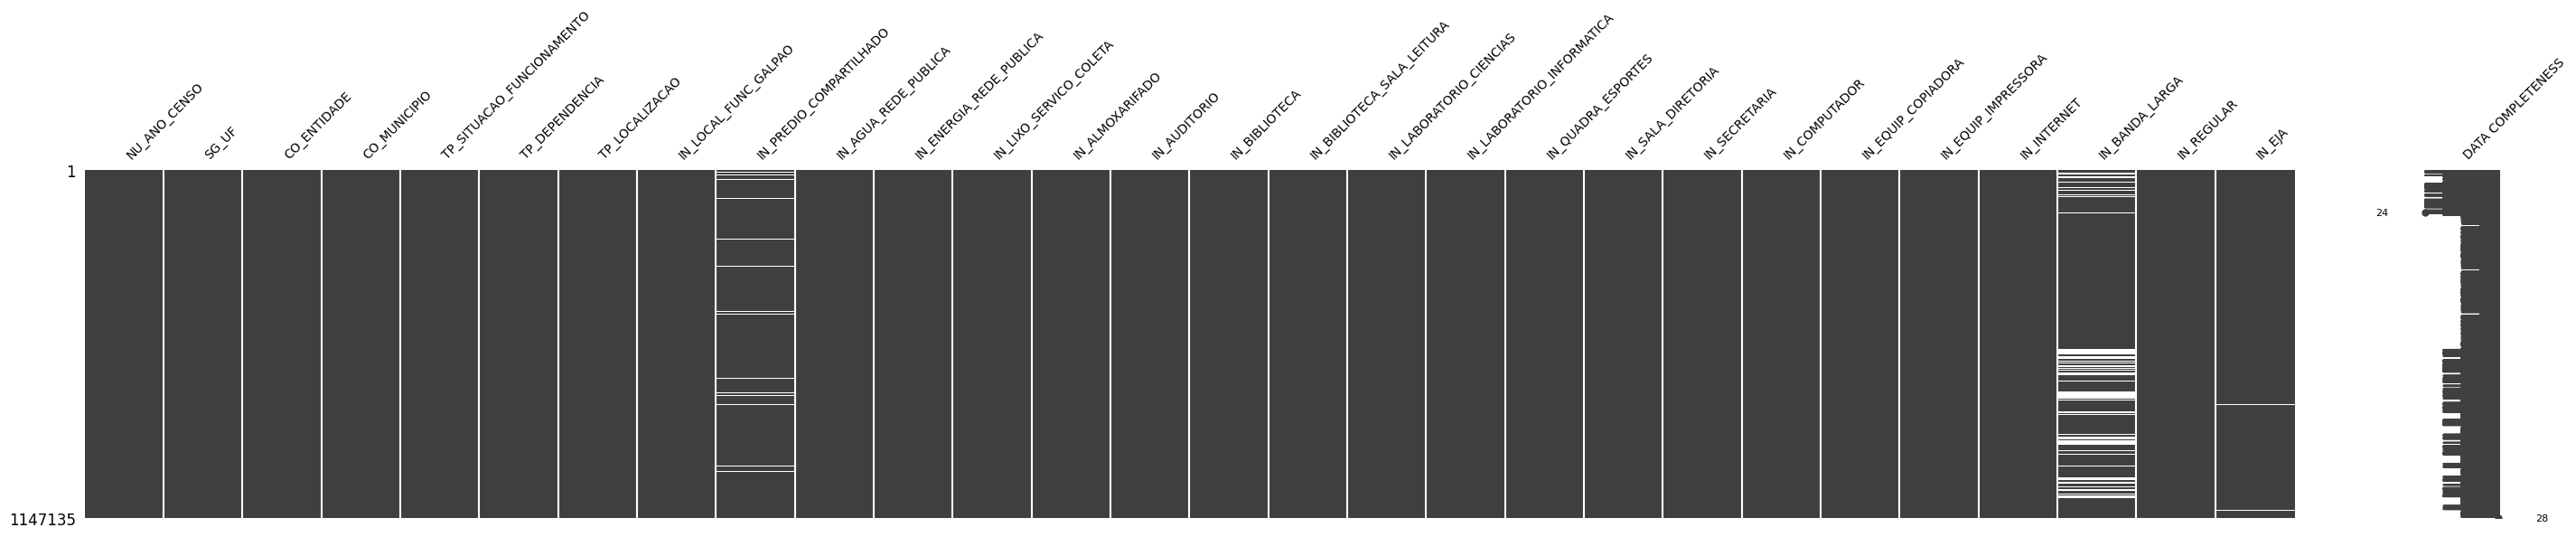

In [18]:
msno.matrix(censo,labels=True,fontsize=10,figsize=(35,5));

In [19]:
censo.shape

(1147135, 28)

In [20]:
censo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1147135 entries, 0 to 1147134
Data columns (total 28 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0   NU_ANO_CENSO                1147135 non-null  int64  
 1   SG_UF                       1147135 non-null  object 
 2   CO_ENTIDADE                 1147135 non-null  int64  
 3   CO_MUNICIPIO                1147135 non-null  int64  
 4   TP_SITUACAO_FUNCIONAMENTO   1147135 non-null  int64  
 5   TP_DEPENDENCIA              1147135 non-null  int64  
 6   TP_LOCALIZACAO              1147135 non-null  int64  
 7   IN_LOCAL_FUNC_GALPAO        1147135 non-null  float64
 8   IN_PREDIO_COMPARTILHADO     1107132 non-null  float64
 9   IN_AGUA_REDE_PUBLICA        1147135 non-null  float64
 10  IN_ENERGIA_REDE_PUBLICA     1147135 non-null  float64
 11  IN_LIXO_SERVICO_COLETA      1147135 non-null  float64
 12  IN_ALMOXARIFADO             1147135 non-null  float64
 1

In [15]:
# censo_2021 = censo[censo['NU_ANO_CENSO'] == 2021]
# censo = censo[censo['NU_ANO_CENSO'] != 2021]

In [16]:
# import numpy as np
# censo_2021['IN_BANDA_LARGA'] = censo_2021['IN_BANDA_LARGA'].replace(np.nan,pd.NA)
# censo_2021['IN_PREDIO_COMPARTILHADO'] = censo_2021['IN_PREDIO_COMPARTILHADO'].replace(np.nan,pd.NA)
# censo_2021['IN_EJA'] = censo_2021['IN_EJA'].replace(np.nan,pd.NA)

In [28]:
varlist = censo.columns[8:]
for var in varlist:
    censo[var] = censo[var].astype(int)

IntCastingNaNError: Cannot convert non-finite values (NA or inf) to integer

In [27]:
censo.dtypes[8:]

IN_PREDIO_COMPARTILHADO       float64
IN_AGUA_REDE_PUBLICA          float64
IN_ENERGIA_REDE_PUBLICA       float64
IN_LIXO_SERVICO_COLETA        float64
IN_ALMOXARIFADO               float64
IN_AUDITORIO                  float64
IN_BIBLIOTECA                 float64
IN_BIBLIOTECA_SALA_LEITURA    float64
IN_LABORATORIO_CIENCIAS       float64
IN_LABORATORIO_INFORMATICA    float64
IN_QUADRA_ESPORTES            float64
IN_SALA_DIRETORIA             float64
IN_SECRETARIA                 float64
IN_COMPUTADOR                 float64
IN_EQUIP_COPIADORA            float64
IN_EQUIP_IMPRESSORA           float64
IN_INTERNET                   float64
IN_BANDA_LARGA                float64
IN_REGULAR                    float64
IN_EJA                        float64
dtype: object

In [4]:
#export data to csv
censo.to_csv('/home/freitas/Downloads/internet2/data/censo_2014_2021.csv', index=False)

AttributeError: 'dict' object has no attribute 'to_csv'